In [105]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [106]:
#Loading dataset
redwine_quality = pd.read_csv("winequality-red.csv", sep=';')

In [107]:
#Let's check how the data is distributed
redwine_quality.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


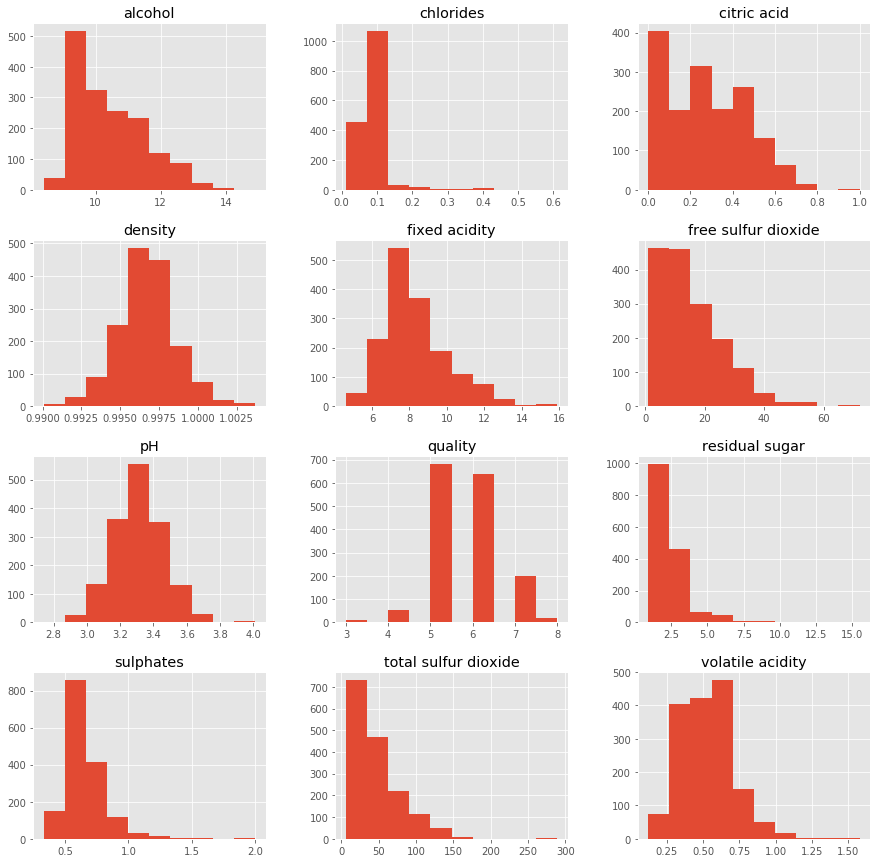

In [108]:
plt.style.use('ggplot')
X = redwine_quality.drop('quality' , 1).values # drop target variable
y1 = redwine_quality['quality'].values
pd.DataFrame.hist(redwine_quality, figsize = [15,15]);

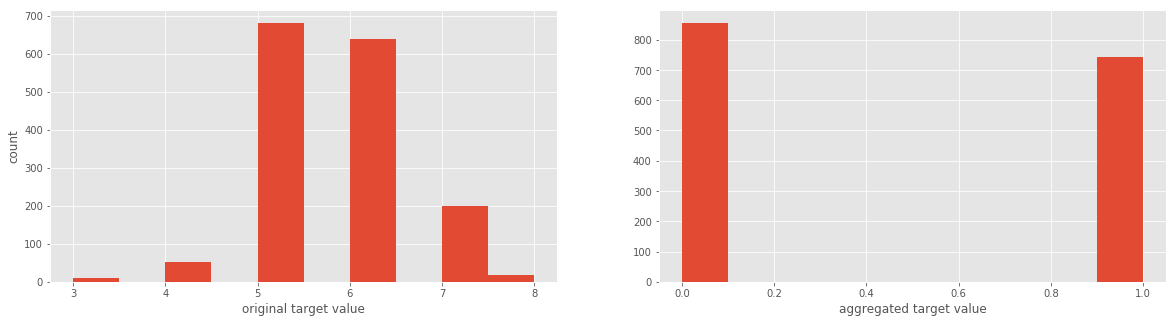

In [109]:
y = y1 <= 5 # is the rating <= 5?
# plot histograms of original target variable
# and aggregated target variable
plt.figure(figsize=(20,5));
plt.subplot(1, 2, 1 );
plt.hist(y1);
plt.xlabel('original target value')
plt.ylabel('count')
plt.subplot(1, 2, 2);
plt.hist(y)
plt.xlabel('aggregated target value')
plt.show()

In [110]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
from sklearn import neighbors, linear_model
knn = neighbors.KNeighborsClassifier(n_neighbors = 5)
knn_model_1 = knn.fit(X_train, y_train)
print('k-NN accuracy for test set: %f' % knn_model_1.score(X_test, y_test))

k-NN accuracy for test set: 0.612500


In [112]:
from sklearn.metrics import classification_report
y_true, y_pred = y_test, knn_model_1.predict(X_test)
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

      False       0.66      0.64      0.65       179
       True       0.56      0.57      0.57       141

avg / total       0.61      0.61      0.61       320



In [113]:
redwine_quality['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

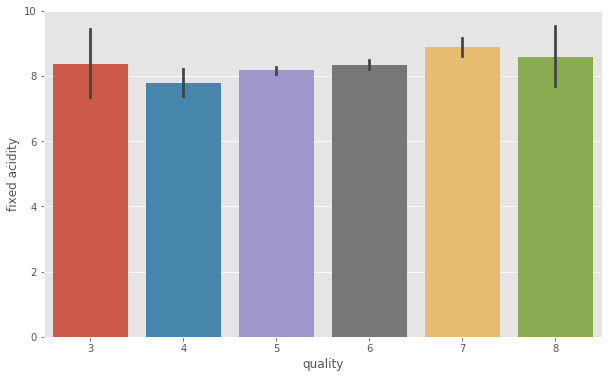

In [114]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = redwine_quality)

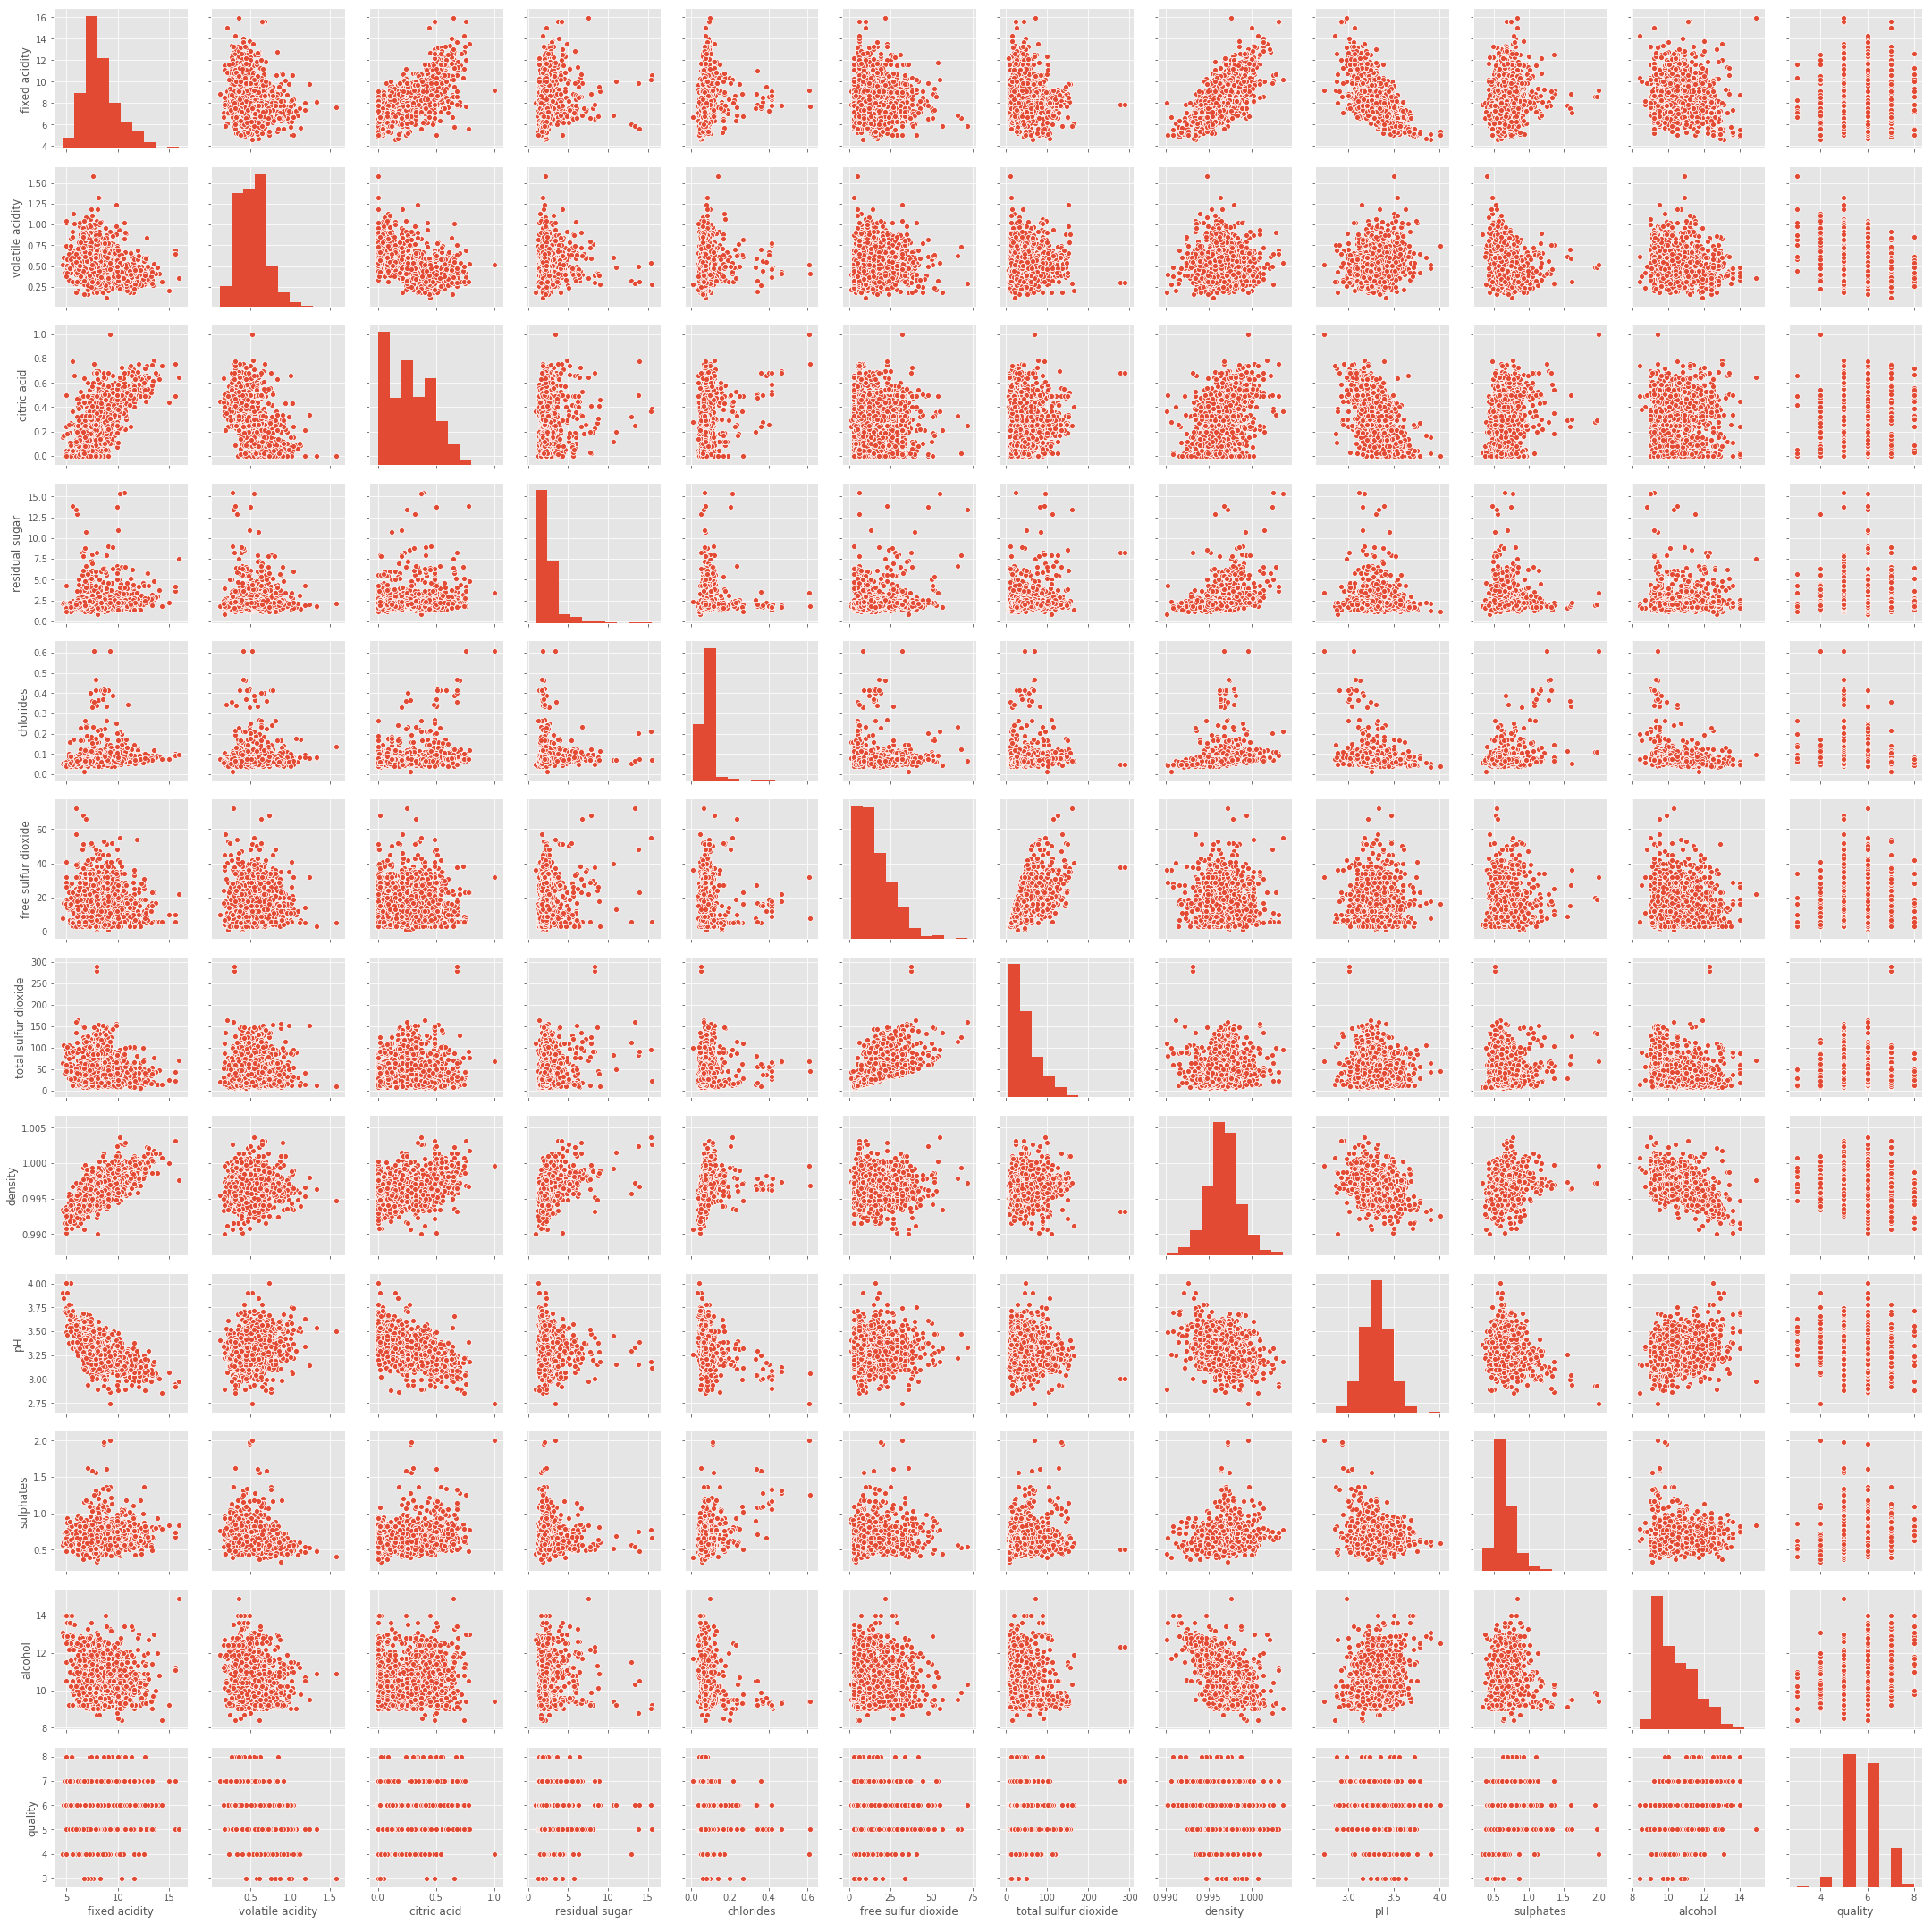

In [115]:
#Check correleation between the variables using Seaborn's pairplot. 
sns.pairplot(redwine_quality)

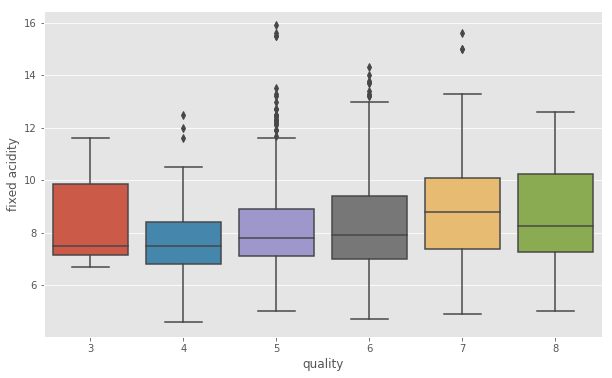

In [116]:
#Plot a boxplot to check for Outliers
#Target variable is Quality. So will plot a boxplot each column against target variable
fig = plt.figure(figsize = (10,6))
sns.boxplot('quality', 'fixed acidity', data = redwine_quality)

<Figure size 720x432 with 0 Axes>

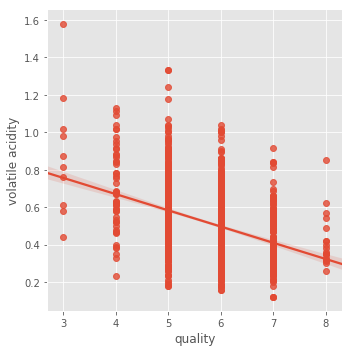

In [139]:
fig = plt.figure(figsize = (10,6))
sns.lmplot('quality', 'volatile acidity',data = redwine_quality)

<Figure size 720x432 with 0 Axes>

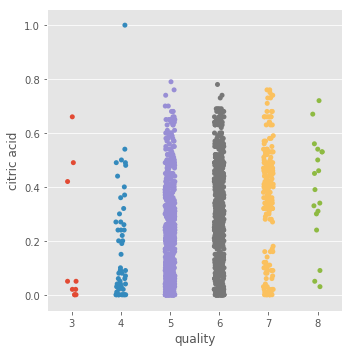

In [140]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.catplot(x = 'quality', y = 'citric acid', data = redwine_quality)

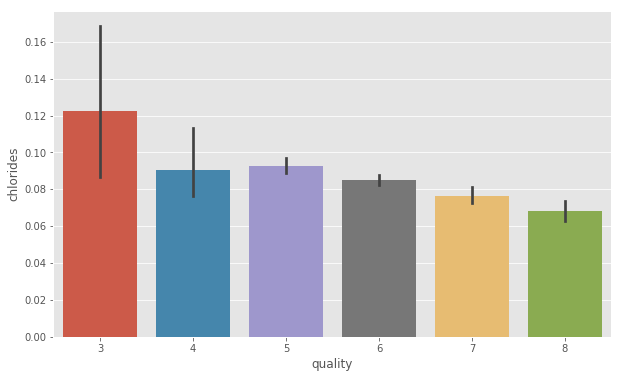

In [134]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = redwine_quality)

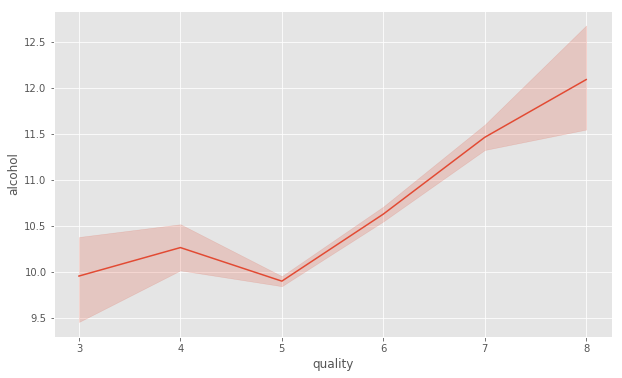

In [132]:
#Alcohol level also goes higher as the quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.lineplot(x = 'quality', y = 'alcohol', data = redwine_quality)

<Figure size 1008x576 with 0 Axes>

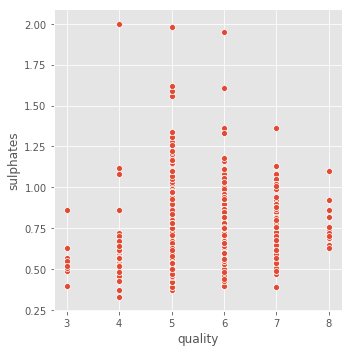

In [131]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (14,8))
sns.relplot(x = 'quality', y = 'sulphates', data = redwine_quality)

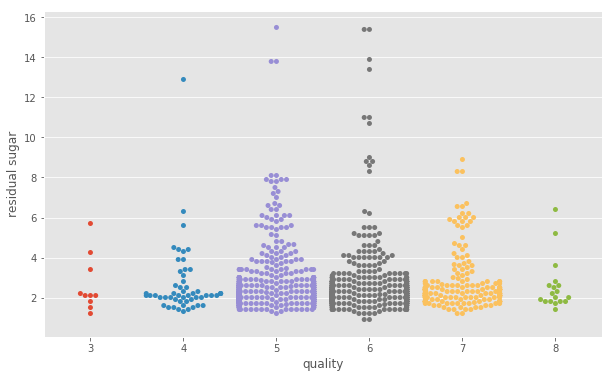

In [122]:
fig = plt.figure(figsize = (10,6))
sns.swarmplot('quality', 'residual sugar', data = redwine_quality)

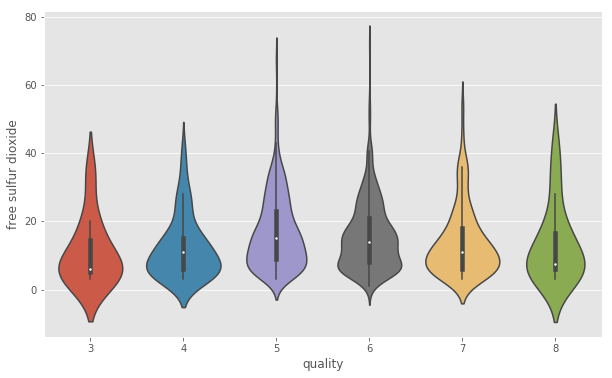

In [124]:
fig = plt.figure(figsize = (10,6))
sns.violinplot(x = 'quality', y = 'free sulfur dioxide', data = redwine_quality)

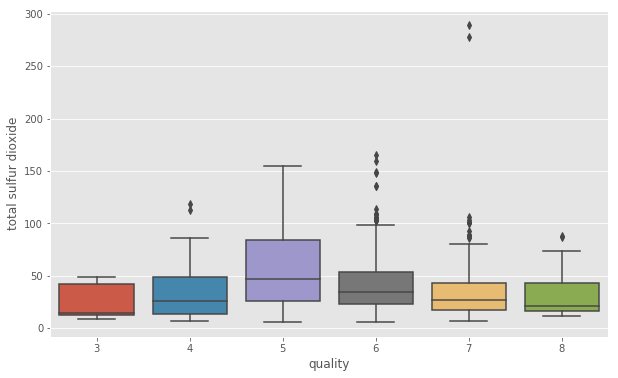

In [125]:
fig = plt.figure(figsize = (10,6))
sns.boxplot('quality', 'total sulfur dioxide', data = redwine_quality)

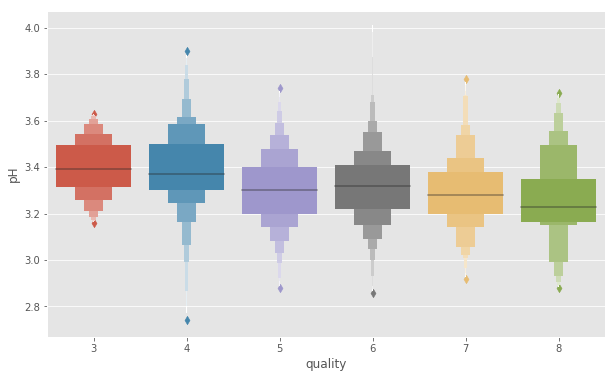

In [126]:
fig = plt.figure(figsize = (10,6))
sns.boxenplot('quality', 'pH', data = redwine_quality)

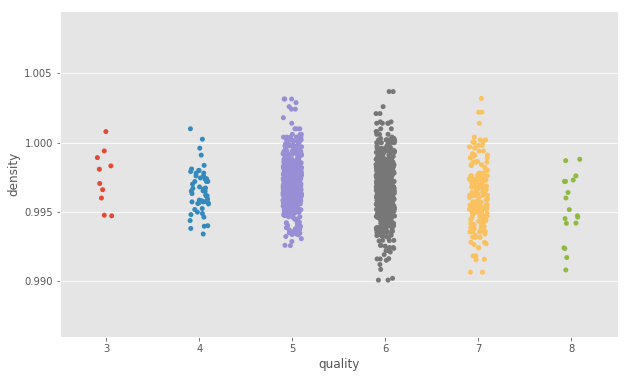

In [127]:
fig = plt.figure(figsize = (10,6))
sns.stripplot('quality', 'density', data = redwine_quality)

#barplot, boxplots show many outliers for quite a few columns. Describe the dataset to get a better idea on what's happening
#fixed acidity - 25% - 7.1 and 50% - 7.9. Not much of a variance. Could explain the huge number of outliers
#volatile acididty - similar reasoning
#citric acid - seems to be somewhat uniformly distributed
#residual sugar - min - 0.9, max - 15!! Waaaaay too much difference. Could explain the outliers.
#chlorides - same as residual sugar. Min - 0.012, max - 0.611
#free sulfur dioxide, total suflur dioxide - same explanation as above

In [39]:
redwine_quality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [40]:
#next we shall create a new column called Review. This column will contain the values of 1,2, and 3. 
#1 - Bad
#2 - Average
#3 - Excellent
#This will be split in the following way. 
#1,2,3 --> Bad
#4,5,6,7 --> Average
#8,9,10 --> Excellent
#Create an empty list called Reviews
reviews = []
for i in redwine_quality['quality']:
    if i >= 1 and i <= 3:
        reviews.append('1')
    elif i >= 4 and i <= 7:
        reviews.append('2')
    elif i >= 8 and i <= 10:
        reviews.append('3')
redwine_quality['Reviews'] = reviews

In [41]:
redwine_quality['Reviews'].unique()

array(['2', '3', '1'], dtype=object)

In [43]:
#count of each target variable
from collections import Counter
Counter(redwine_quality['quality'])

Counter({3: 10, 4: 53, 5: 681, 6: 638, 7: 199, 8: 18})

In [44]:
Counter(redwine_quality['Reviews'])

Counter({'1': 10, '2': 1571, '3': 18})

In [46]:
x = redwine_quality.iloc[:,:11]
y = redwine_quality['Reviews']

In [47]:
x.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5


In [48]:
y.head(10)

0    2
1    2
2    2
3    2
4    2
5    2
6    2
7    2
8    2
9    2
Name: Reviews, dtype: object

In [51]:
# Making binary classificaion for the response variable.
# Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
redwine_quality['quality'] = pd.cut(redwine_quality['quality'], bins = bins, labels = group_names)

Proceed with Modelling. We will use the following algorithms

- 1 Logistic Regression
- 2 Decision Trees
- 3 Naive Bayes
- 4 Random Forests
- 5 SVM

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [54]:
# Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [55]:
#Bad becomes 0 and good becomes 1 
redwine_quality['quality'] = label_quality.fit_transform(redwine_quality['quality'])

In [56]:
redwine_quality['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

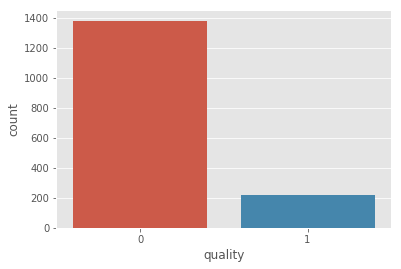

In [57]:
sns.countplot(redwine_quality['quality'])

In [58]:
#Now seperate the dataset as response variable and feature variabes
X = redwine_quality.drop('quality', axis = 1)
y = redwine_quality['quality']

In [59]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [60]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [61]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [62]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [63]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))

             precision    recall  f1-score   support

          0       0.90      0.97      0.93       273
          1       0.68      0.40      0.51        47

avg / total       0.87      0.88      0.87       320



In [64]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_rfc))

[[264   9]
 [ 28  19]]


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

In [67]:
#print confusion matrix and accuracy score
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print(lr_conf_matrix)
print(lr_acc_score*100)

[[268   5]
 [ 36  11]]
87.1875


In [68]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_predict = dt.predict(X_test)

In [69]:
#print confusion matrix and accuracy score
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
print(dt_conf_matrix)
print(dt_acc_score*100)

[[250  23]
 [ 23  24]]
85.625


In [70]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_predict=nb.predict(X_test)

In [71]:
#print confusion matrix and accuracy score
nb_conf_matrix = confusion_matrix(y_test, nb_predict)
nb_acc_score = accuracy_score(y_test, nb_predict)
print(nb_conf_matrix)
print(nb_acc_score*100)

[[252  21]
 [ 31  16]]
83.75


Similar accuracy as Decision Tree. Let's use RandomForest classifier now.

In [72]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predict=rf.predict(X_test)

In [73]:
# Print confusion matrix and accuracy score
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score*100)

[[266   7]
 [ 29  18]]
88.75


88% accuracy! Improvement from Decision Tree and Naive Bayes but the same as Logistic Regression Classifier

In [ ]:
# we shall use the rbf kernel first and check the accuracy
lin_svc = SVC()
lin_svc.fit(X_train, y_train)
lin_svc=rf.predict(X_test)

In [75]:
# Print confusion matrix and accuracy score
lin_svc_conf_matrix = confusion_matrix(y_test, rf_predict)
lin_svc_acc_score = accuracy_score(y_test, rf_predict)
print(lin_svc_conf_matrix)
print(lin_svc_acc_score*100)

[[266   7]
 [ 29  18]]
88.75


88.75% accuracy with RBF Kernel! Same as Random Forest! Let's try the linear kernel now and see if it improves our accuracy in any way.

In [77]:
rbf_svc = SVC(kernel='linear')
rbf_svc.fit(X_train, y_train)
rbf_svc=rf.predict(X_test)

In [78]:
rbf_svc_conf_matrix = confusion_matrix(y_test, rf_predict)
rbf_svc_acc_score = accuracy_score(y_test, rf_predict)
print(rbf_svc_conf_matrix)
print(rbf_svc_acc_score*100)

[[266   7]
 [ 29  18]]
88.75


#### Conclusion: The same accuracy! So we can see that the SVC and the Random Forest give us good prediction accuracy for the Wine Classification problem. We might further improve accuracy by fine-tuning the parameters of each classifier

## Thank you 